In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(13,6))

<Figure size 1300x600 with 0 Axes>

<Figure size 1300x600 with 0 Axes>

In [23]:
pip install scikit-learn

## Lets load california house pricing dataset

In [24]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [25]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [26]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [27]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## Prepare a dataset

In [28]:
df = pd.DataFrame(housing.data,columns=housing.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [29]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [30]:
df["target"] = housing.target

In [31]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [33]:
# check stats of data
# check missing values
# check corr and multicolinearity

In [34]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [35]:
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [36]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [37]:
import seaborn as sns

<Axes: >

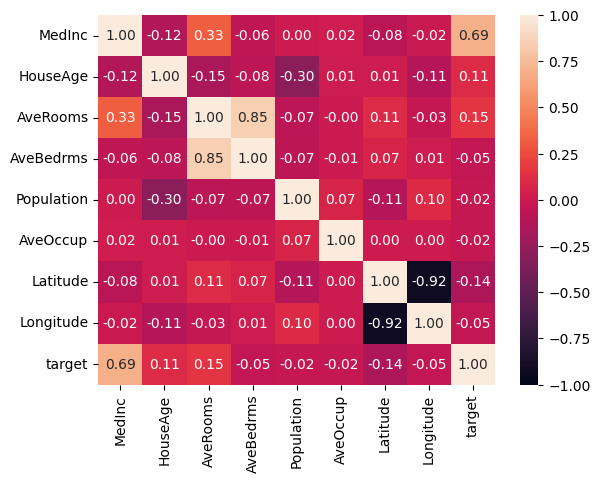

In [38]:
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True,fmt='.2f')

In [39]:
df.drop("AveBedrms",axis=1,inplace=True)

In [40]:
df

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,-121.32,0.847


<Axes: >

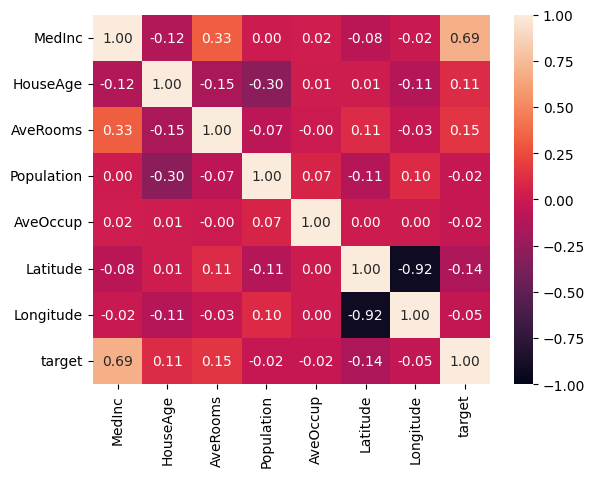

In [41]:
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True,fmt='.2f')

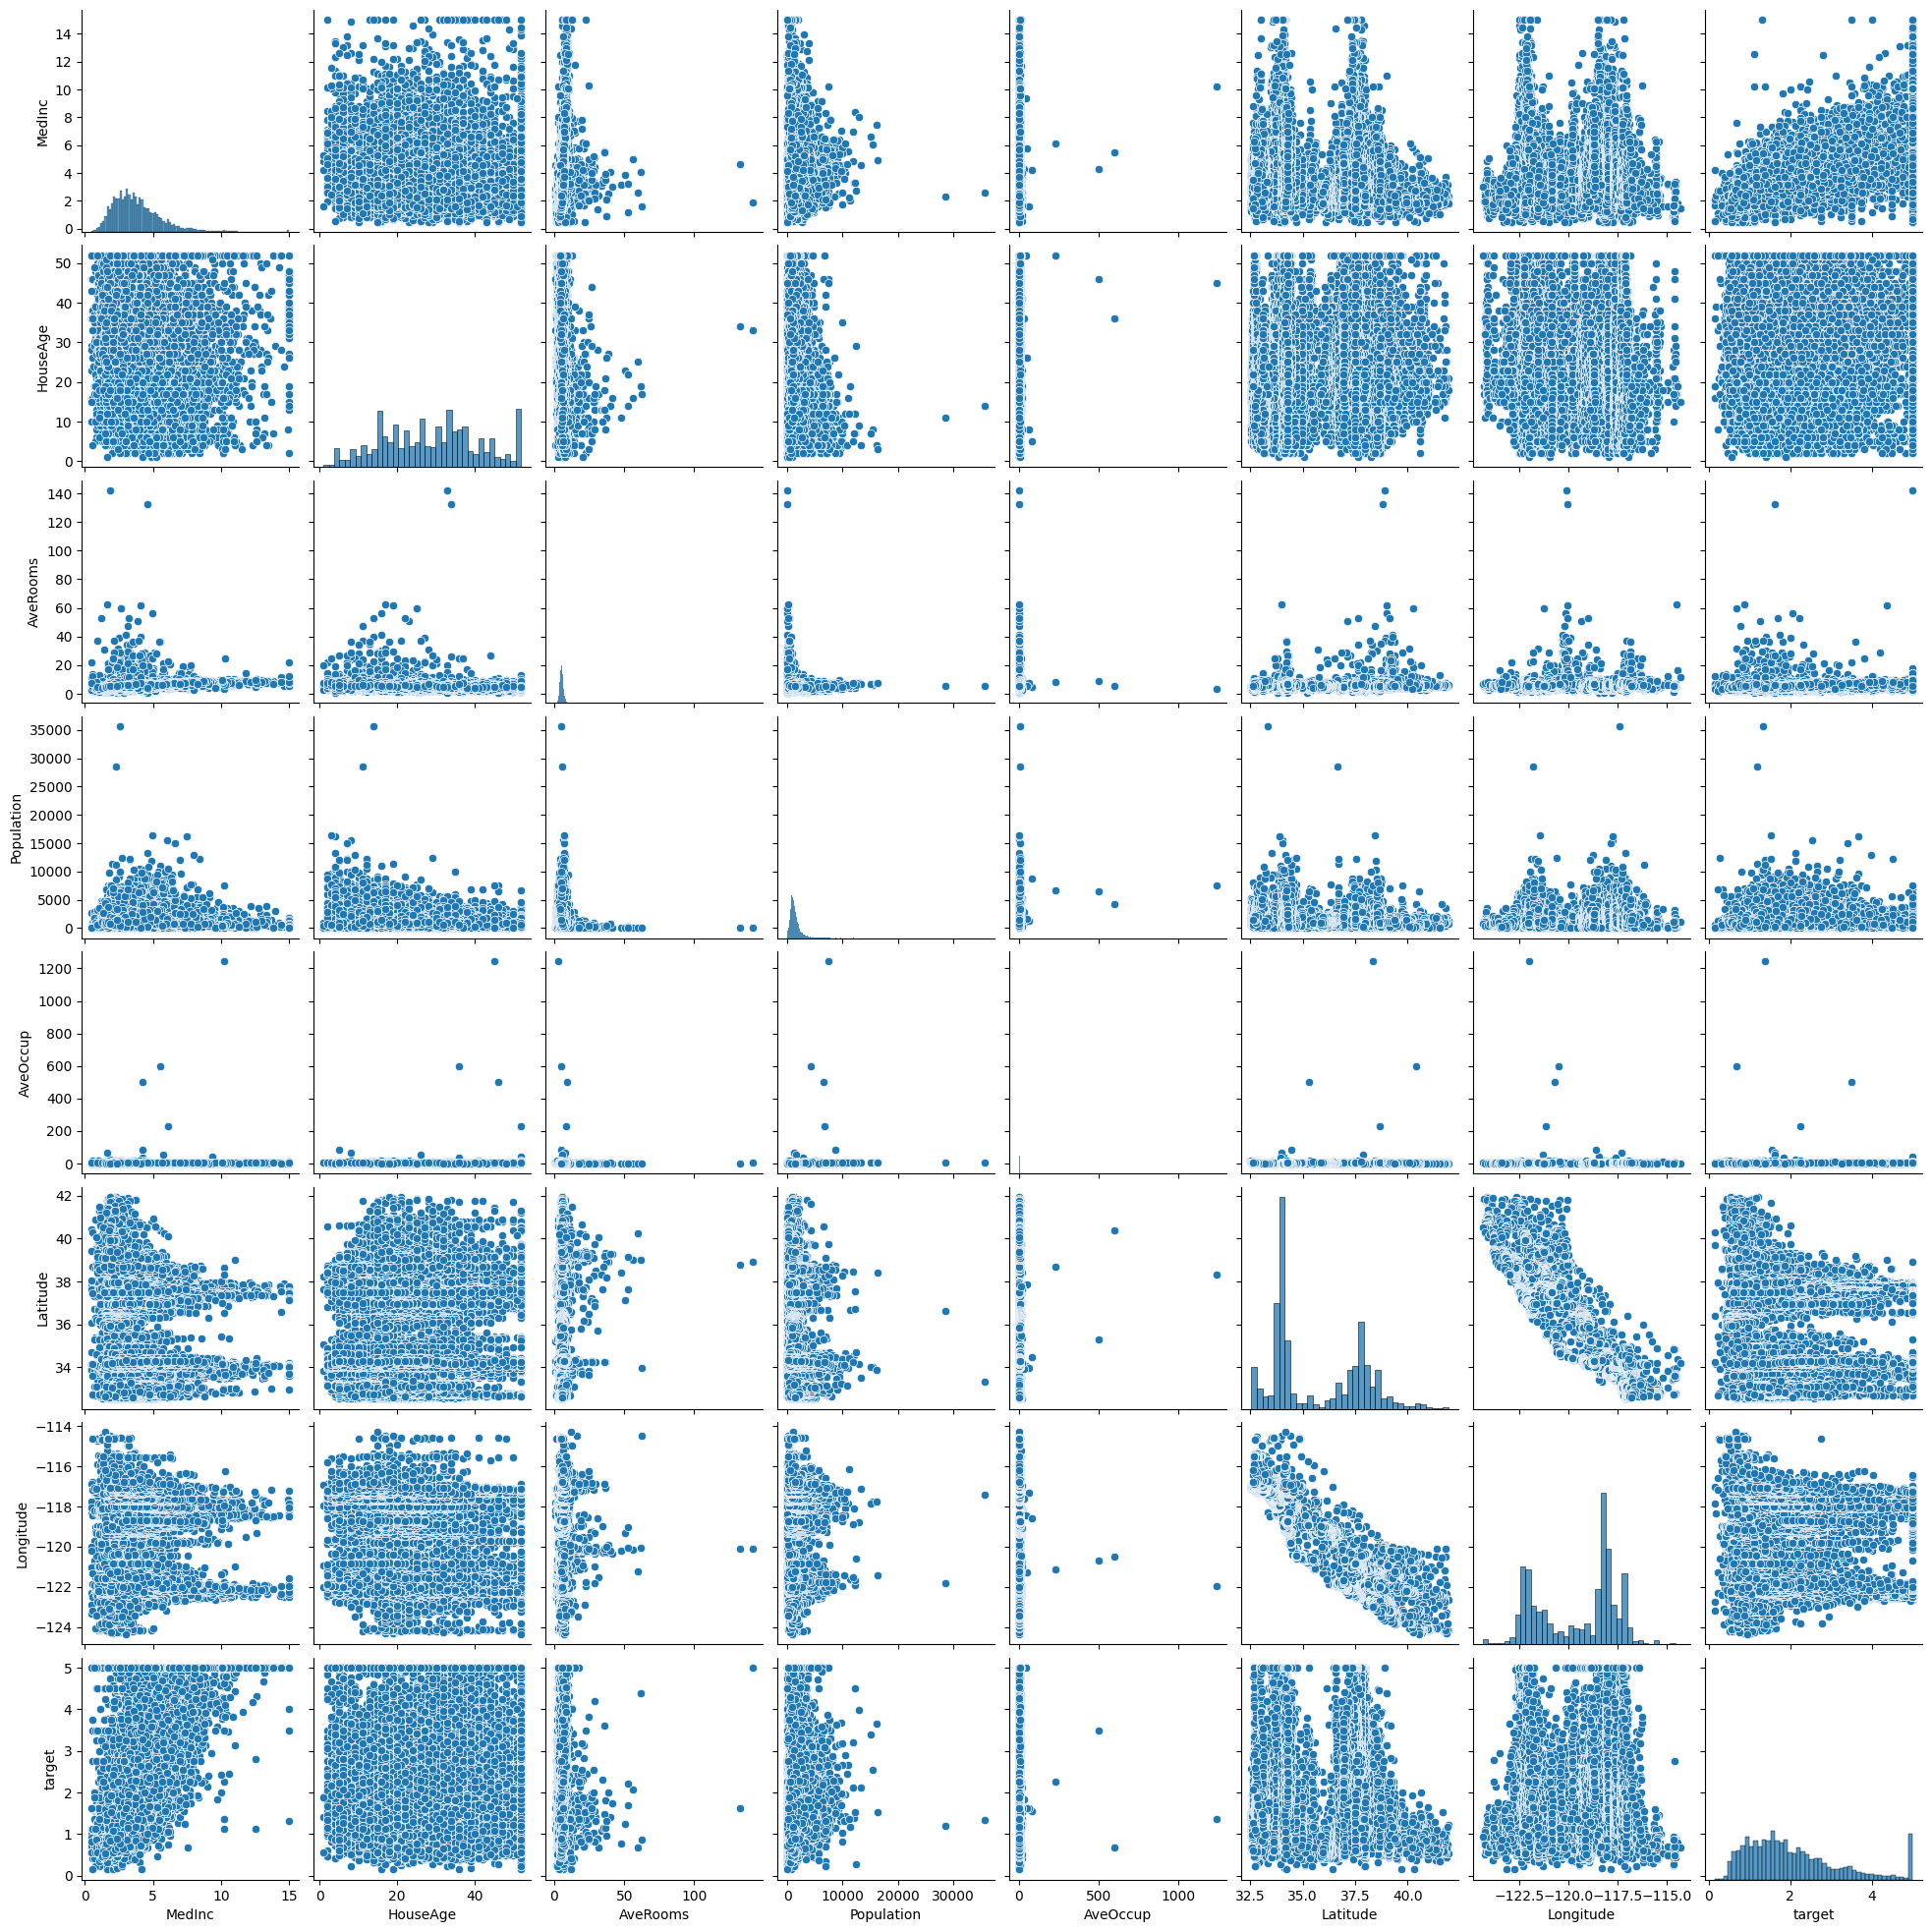

In [42]:
sns.pairplot(df)

In [43]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude',
       'Longitude', 'target'],
      dtype='object')

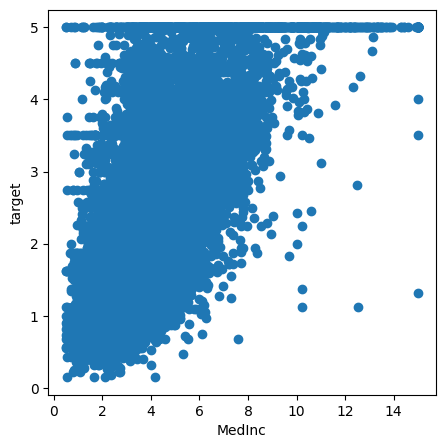

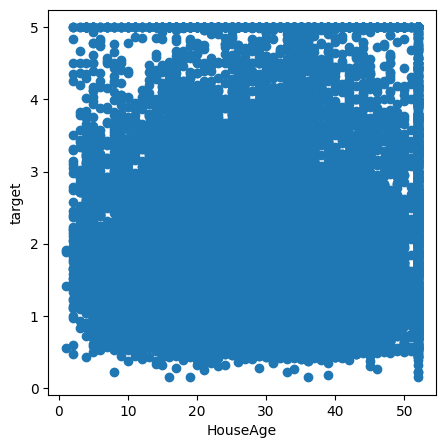

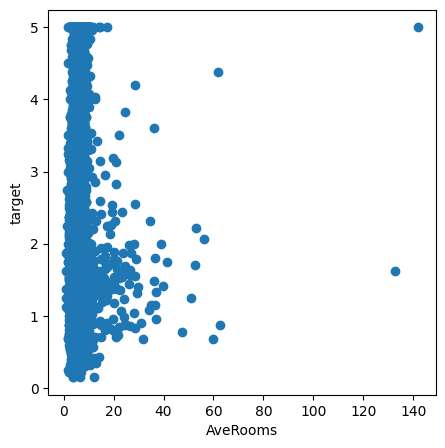

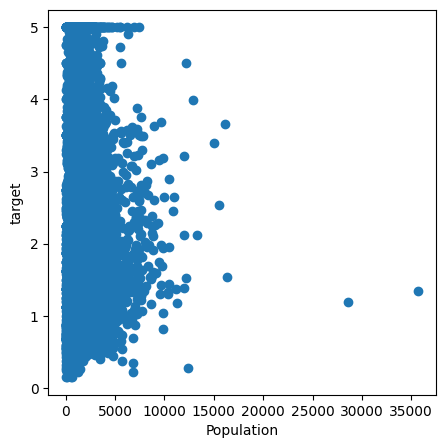

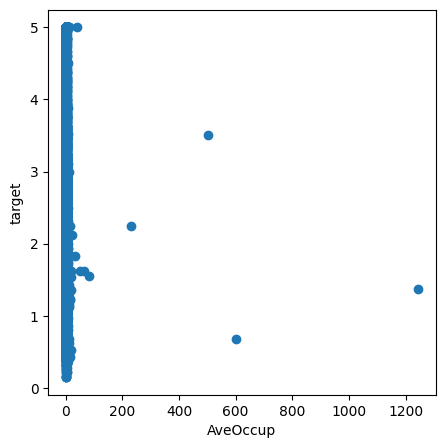

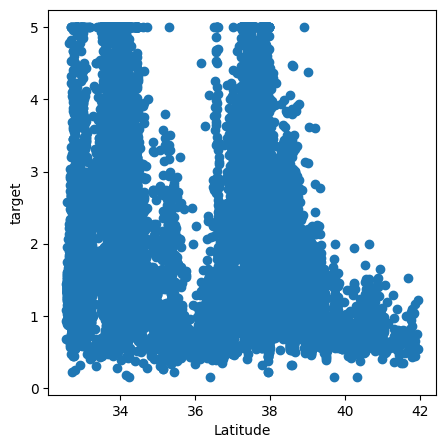

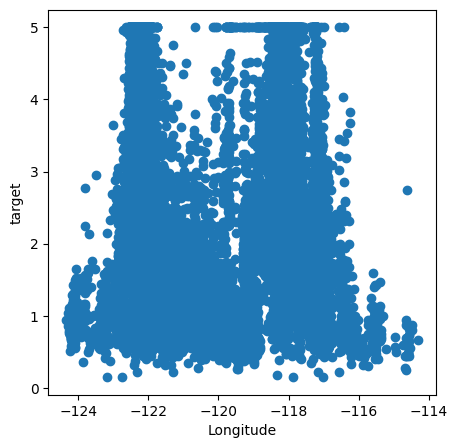

In [44]:
for x in df.columns:
    if x!= "target":
        plt.figure(figsize=(5,5))
        plt.scatter(df[x],df['target'])
        plt.xlabel(x)
        plt.ylabel("target")

<Axes: xlabel='MedInc', ylabel='target'>

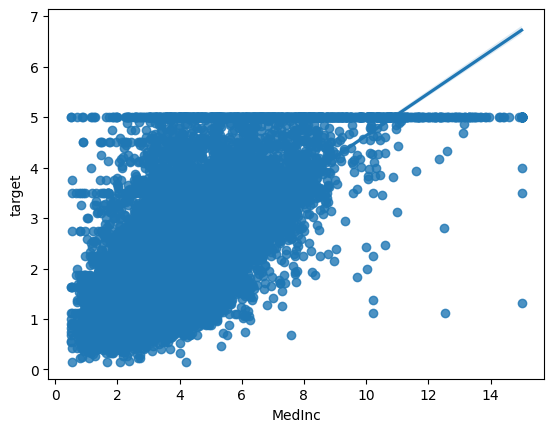

In [45]:
sns.regplot(df,x="MedInc",y="target")

In [46]:
#First we should transform our data to standard scalar
#then do the split

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [48]:
# separate X and y data

X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [49]:
X = scaler.fit_transform(X)

In [50]:
X

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [51]:
X.shape

(20640, 7)

In [52]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

In [53]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=42)

In [54]:
print("X_train.shape",X_train.shape)
print("y_train.shape",y_train.shape)
print("X_test.shape",X_test.shape)
print("y_test.shape",y_test.shape)

X_train.shape (14448, 7)
y_train.shape (14448,)
X_test.shape (6192, 7)
y_test.shape (6192,)


In [55]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model = lr_model.fit(X,y)

In [56]:
print("lr_model coefficients",lr_model.coef_)
print("lr_model intercept",lr_model.intercept_)

lr_model coefficients [ 0.70313305  0.12146995  0.04210431 -0.00364717 -0.03710482 -0.97873933
 -0.932619  ]
lr_model intercept 2.068558169089138


In [57]:
y_pred = lr_model.predict(scaler.transform(X_test))

c:\Users\raina\miniconda3\envs\shravan\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [58]:
y_test = np.array(y_test)

In [59]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(y_test, y_pred))

-1287.6180705924808


In [60]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

41.117331960686045
1691.362901306347


In [61]:
lr_model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'positive': False,
 'tol': 1e-06}

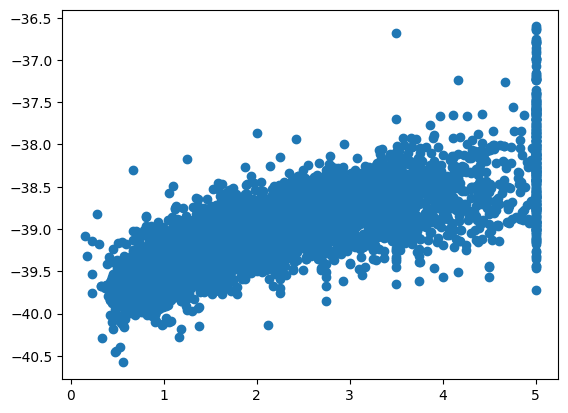

In [62]:
plt.scatter(y_test,y_pred)

In [63]:
residuals = y_pred - y_test
print(residuals)

[-40.18617718 -39.68955723 -43.91498676 ... -41.28868475 -40.37217423
 -41.32071753]


<Axes: ylabel='Count'>

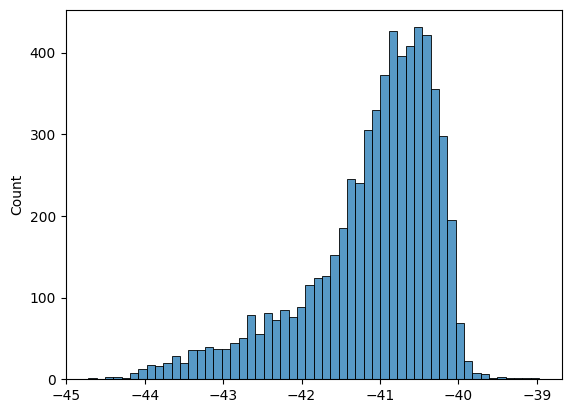

In [64]:
# residuals should be normally distributed
sns.histplot(residuals)

C:\Users\raina\AppData\Local\Temp\ipykernel_19480\2665350104.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: ylabel='Density'>

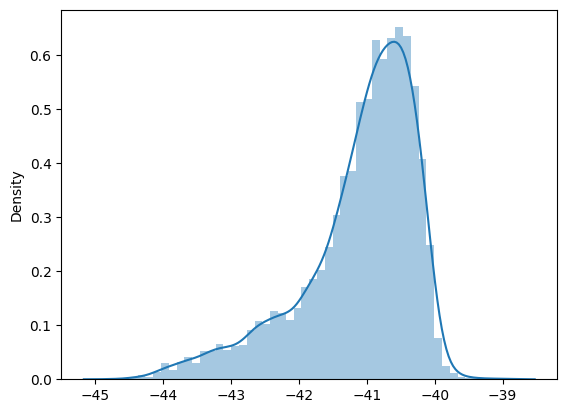

In [65]:
sns.distplot(residuals)

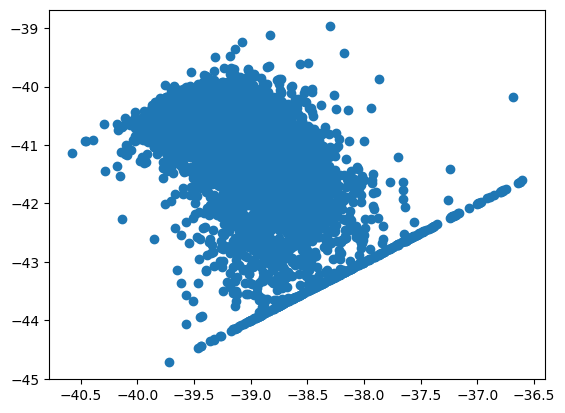

In [66]:
plt.scatter(y_pred,residuals)

## NEW DATA PREDICTION

In [67]:
#the inputs should always be in 2d array or dataframe
#the output will always be a 1d array

In [68]:
X[0].shape

(7,)

In [69]:
lr_model.predict(X[0].reshape(1,-1))

array([4.07659448])

## Pickle the model file for deployment

In [70]:
import pickle

In [71]:
# dump the model as a pkl file which can be deployed anywhere
# then load the model to make predictions
pickle.dump(lr_model,open("lr_model.pkl","wb"))

In [72]:
pickled_model = pickle.load(open("lr_model.pkl","rb"))

In [73]:

pickled_model.predict(X[0].reshape(1,-1))  #input must always be a 2d array

array([4.07659448])

In [21]:
import pickle
pickle.dump(scaler,open("scaler.pkl","wb"))